In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm 
import statistics

In [3]:
#Init dataframe 
birds = pd.read_excel("2007-2017 bird watch data.xlsx")

In [3]:
#Most and least common birds spotted
top_five = birds['Common_Name'].value_counts().head(5)
bottom_five = birds['Common_Name'].value_counts().tail(5)
print('top five most commonly spotted:\n{}'.format(top_five))
print('bottom five most commonly spotted:\n{}'.format(bottom_five))

top five most commonly spotted:
Common_Name
Northern Cardinal     914
Indigo Bunting        891
Field Sparrow         881
American Goldfinch    869
Chipping Sparrow      685
Name: count, dtype: int64
bottom five most commonly spotted:
Common_Name
Cooper's Hawk                  1
Unidentified Owl               1
Black-throated Blue Warbler    1
Summer Tanager                 1
Yellow-rumped Warbler          1
Name: count, dtype: int64


In [4]:
#Birds spotted each year
birds.groupby('Year')['Common_Name'].count()

Year
2007     197
2008     202
2009     160
2010     174
2011     160
2012     151
2013     198
2014     493
2015    4253
2016    3942
2017    4300
Name: Common_Name, dtype: int64

In [5]:
#Northern Cardinal spotting over time 
birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size()

Year
2007     17
2008     13
2009     14
2010     12
2011      8
2012     15
2013     15
2014     51
2015    250
2016    250
2017    269
dtype: int64

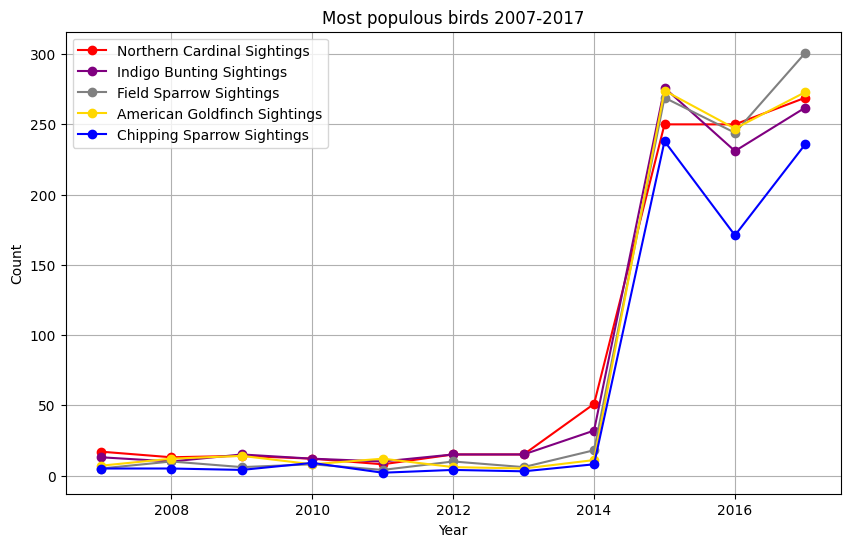

In [6]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds[birds['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds[birds['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds[birds['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds[birds['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2007-2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
birds_early = birds[(birds['Year'] >= 2007) & (birds['Year'] <= 2014) & (birds['Common_Name'])]
birds_late = birds[(birds['Year'] > 2014) & (birds['Common_Name'])]

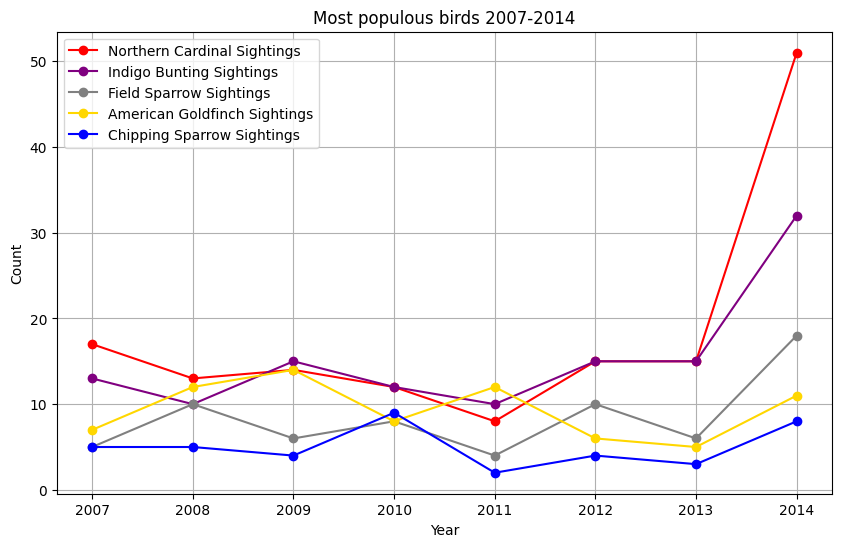

In [8]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_early[birds_early['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2007-2014')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

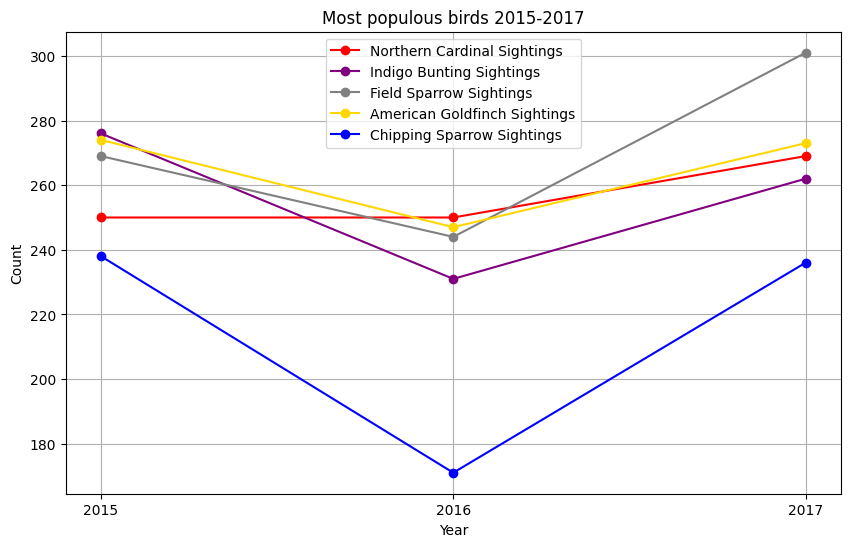

In [9]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_late[birds_late['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Most populous birds 2015-2017')
#change the ticks of x to only be whole numbers
plt.xticks(range(min(birds_late['Year']), max(birds_late['Year'])+1, 1))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
#Average temperature for Northern Cardinal (early)
birds_early['Common_Name']

0           Acadian Flycatcher
1        Blue-gray Gnatcatcher
2           Acadian Flycatcher
3           American Goldfinch
4                American Crow
                 ...          
2769             American Crow
2770             American Crow
2771               Wild Turkey
2772          Chipping Sparrow
2773    Red-bellied Woodpecker
Name: Common_Name, Length: 1735, dtype: object

In [11]:
#All birds which have been spotted only once 
#TODO exclude unidentified and make it an actual function 
#rare_birds = birds['Common_Name'].value_counts()[birds['Common_Name'].value_counts() < 10]
rare_birds = birds[['Common_Name','Year']].value_counts('Common_Name') < 10
print(rare_birds)

Common_Name
Northern Cardinal               False
Indigo Bunting                  False
Field Sparrow                   False
American Goldfinch              False
Chipping Sparrow                False
                                ...  
Green Heron                      True
Black-throated Green Warbler     True
Unidentified Owl                 True
Black-throated Blue Warbler      True
Bay-breasted Warbler             True
Name: count, Length: 117, dtype: bool


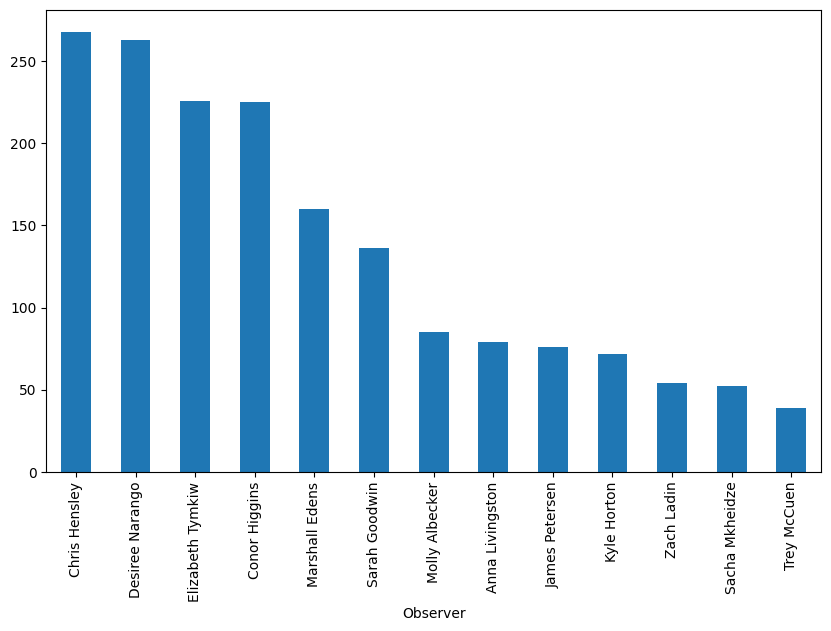

In [47]:
plt.figure(figsize=(10, 6))  # Modify the size according to your preference
birds_early['Observer'].value_counts().plot(kind='bar')
plt.show()

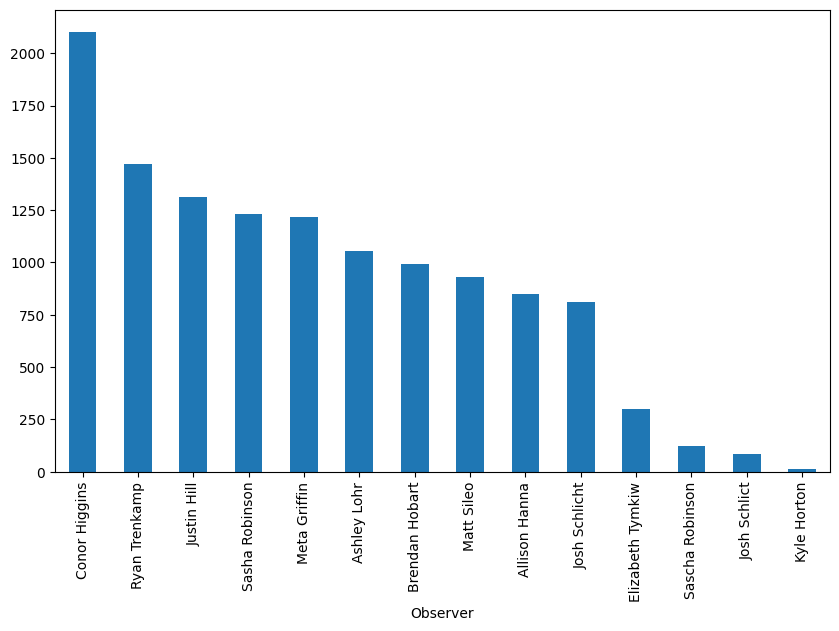

In [48]:
plt.figure(figsize=(10, 6))  # Modify the size according to your preference
birds_late['Observer'].value_counts().plot(kind='bar')
plt.show()

In [14]:
#Convert strings into index and then run corr, cannot do it on strings 
birds.corr()

ValueError: could not convert string to float: 'ANTI'

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,85824,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,88038,BGGN,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,85824,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
3,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,95300,AMGO,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
4,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,87106,AMCR,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
